In [2]:
dc3 = { 
   "turma":{ 
      "aluno":{ 
         "nome":"Joao",
         "notas":{ 
            "portugues":2,
            "matematica":9
         }
      }
   }
}

import matplotlib.pyplot as plt
import seaborn as sns

def violin_plot_states(dc_states,lista_estados):
    f, ax = plt.subplots(1,1,figsize=(16,4))
    data_plot = pd.DataFrame.from_dict(dc_states,orient='index').T.melt().rename(columns={'variable':'state','value':'z_score'})
    states_plot = lista_estados
    sns.violinplot(x='state',y='z_score',data=data_plot[data_plot.state.isin(states_plot)])    
    ax.axhline(0,color='black',alpha=0.3)

1. Crie uma função que recebe uma lista e retorna o valor máximo e mínimo da lista (não utilize a função max() e min()).


---



In [3]:
def valida_max_min (lista):
    lista.sort()
    min=lista[0]
    max=lista[-1]
    return min, max

#chama função
result_min_max = valida_max_min([4,5,10,0,43,50,2])
print(result_min_max)

(0, 50)


2. Crie uma função que recebe dois parâmetros (início e fim) e retorna uma lista com todos os valores pares entre ínicio e fim.


In [4]:
def gera_pares (num_ini, num_fim): 
    lista =[]
    for num in list(range(num_ini, num_fim)):
        if num % 2 == 0:
            lista.append(num)
    return lista

#chama função
lista_pares = gera_pares(101,245)
print(lista_pares)

[102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244]


3. Acesse a nota de matemática em dc3 e altere para 3.

In [5]:
dc3['turma']['aluno']['notas']['matematica'] = 3
dc3['turma']['aluno']['notas']['matematica']

3

# Avaliação



Para as questões 4 a 8 utilize o dataset 'water_potability.csv'. O dataset descreve características de uma amostra de água e na coluna 'potability' descreve se a água é ou não própria para consumo humano. Para iniciar a resolução das questões abaixo drope a coluna 'Unnamed: 0'.



In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('water_potability.csv',sep=';')


In [9]:
#df # 3276 linhas
df = df.drop(columns=['Unnamed: 0'])

4. Demonstre a correlação entre todas as colunas do dataset. Qual é a coluna com maior correlação positiva com 'potability'? Desconsidere a correlação com ela mesma (valor 1.0).

In [10]:
df.corr().abs() #correlação entre todas da colunas do dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,0.089288,0.034350,0.018203,0.018614,0.043503,0.003354,0.039057,0.003556
Hardness,0.082096,1.000000,0.046899,0.030054,0.106923,0.023915,0.003610,0.013013,0.014449,0.013837
Solids,0.089288,0.046899,1.000000,0.070148,0.171804,0.013831,0.010242,0.009143,0.019546,0.033743
Chloramines,0.034350,0.030054,0.070148,1.000000,0.027244,0.020486,0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,0.106923,0.171804,0.027244,1.000000,0.016121,0.030831,0.030274,0.011187,0.023577
Conductivity,0.018614,0.023915,0.013831,0.020486,0.016121,1.000000,0.020966,0.001285,0.005798,0.008128
Organic_carbon,0.043503,0.003610,0.010242,0.012653,0.030831,0.020966,1.000000,0.013274,0.027308,0.030001
Trihalomethanes,0.003354,0.013013,0.009143,0.017084,0.030274,0.001285,0.013274,1.000000,0.022145,0.007130
Turbidity,0.039057,0.014449,0.019546,0.002363,0.011187,0.005798,0.027308,0.022145,1.000000,0.001581
Potability,0.003556,0.013837,0.033743,0.023779,0.023577,0.008128,0.030001,0.007130,0.001581,1.000000


In [104]:
#Qual é a coluna com maior correlação positiva com 'potability'
#faço a correlação absoluta entre as séries, daí pego apenas a série Potability
#ordeno os valores de forma descrescente e faço um reset_index para tornar acessível o "nome da coluna comparada"
valida_corr = df.corr().abs()['Potability'].sort_values(ascending=False).reset_index()
valida_corr['index'][1] #aqui pego o none da segunda linha, pois a primeira é de correlação 1, que é justamente a corr  potability x potability

'Solids'

5. Crie uma série que descreve (em porcentagem) quanto cada coluna tem de valores nulos. Qual a coluna com maior porcentagem de valores nulos?


In [106]:
 reg_nulos = df.isna().sum() /df.shape[0] * 100 #total registros nulos / #qtde total registros
 reg_nulos.sort_values(ascending=False)

 #sulfate é a coluna com mais valores nulos

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
sample_id           0.000000
state               0.000000
Potability          0.000000
Turbidity           0.000000
Organic_carbon      0.000000
Conductivity        0.000000
Chloramines         0.000000
Solids              0.000000
Hardness            0.000000
dtype: float64

6. Crie uma coluna dentro do dataset que descreve se 'Turbidity' está acima ou abaixo da média.


In [13]:
media = df.Turbidity.mean()
def acima_abaixo(valor):
    if valor >= media:
        return 'acima da média'
    else:
        return 'abaixo da média'

new_df=df.assign(nova_coluna = lambda x: x.Turbidity.apply(acima_abaixo))

7. Quantas amostras de água são potáveis e não potáveis, utilize a coluna criada na questão 6 como dimensão de análise.

In [14]:
new_df.shape

(3276, 13)

In [15]:
new_df.nova_coluna.value_counts()

abaixo da média    1660
acima da média     1616
Name: nova_coluna, dtype: int64

8. Crie um dataframe onde o índice deve ser cada estado e com duas colunas. A primeira é a porcentagem de amostras não potáveis naquele estado e a segunda é a porcentagem de amostras potáveis naquele estado. Qual é o estado com a menor porcentagem de amostras de água potável?

In [16]:
#forma 1, mais simples, traz o total por potabilidade x estado
#abaixo da média = não potável
#acima da média = potável
pd.pivot_table(new_df, index = ['state','nova_coluna'], values='Chloramines', aggfunc = 'count')

Chloramines
state         nova_coluna                 
Alabama       abaixo da média           25
              acima da média            29
Alaska        abaixo da média           32
              acima da média            36
Arizona       abaixo da média           41
...                                    ...
West Virginia acima da média            30
Wisconsin     abaixo da média           43
              acima da média            29
Wyoming       abaixo da média           29
              acima da média            36

[100 rows x 1 columns]

In [67]:
#forma 2 - agregando e fazendo merges, até chegar no percentil potável e não potável
new_df_total = new_df.groupby('state').agg(total_amostras=('nova_coluna','count'))#dfcompleto
new_df_abaixo = new_df[(new_df.nova_coluna == 'abaixo da média')].loc[:,['state','nova_coluna']].groupby('state').agg(amostras_potaveis=('nova_coluna','count'))
new_df_acima = new_df[(new_df.nova_coluna == 'acima da média')].loc[:,['state','nova_coluna']].groupby('state').agg(amostras_NaoPotaveis=('nova_coluna','count'))
m = pd.merge(new_df_total, new_df_abaixo, how = 'inner', on = 'state')
m = pd.merge(m, new_df_acima, how = 'inner', on = 'state')
m = m.assign(perc_amostras_NaoPotaveis = lambda x: x.amostras_NaoPotaveis/x.total_amostras*100) 
m = m.assign(perc_amostras_Potaveis = lambda x: x.amostras_potaveis/x.total_amostras*100) 
m = m.drop(columns=['total_amostras','amostras_potaveis','amostras_NaoPotaveis'])
m.sample(10)

,perc_amostras_NaoPotaveis,perc_amostras_Potaveis
state,,
Pennsylvania,42.857143,57.142857
Connecticut,48.387097,51.612903
Delaware,60.317460,39.682540
Illinois,44.067797,55.932203
North Dakota,37.179487,62.820513
New York,53.731343,46.268657
Arizona,42.253521,57.746479
Maryland,64.912281,35.087719
North Carolina,44.067797,55.932203


9. Utlizando dados coletados da internet sobre a quantidade de habitantes de cada estado no ano 2020 responda. Qual estado, com populacao acima de 10 milhões de habitantes, tem a maior porcentagem de amostras de águas não potável?

In [96]:
#usando uma tabela formada com cópia de dados da página web
df_habitantes = pd.read_csv('estadosusa.csv', sep=';')
df_habitantes.head()
df_habitantes.set_index('State Name')
df_analise = pd.merge(m, df_habitantes, how = 'inner', left_on = 'state', right_on = 'State Name')

In [102]:
df_analise[df_analise.Population > 10000000].sort_values('perc_amostras_NaoPotaveis', ascending=False).iloc[0,:]

#Resposta: Michigan

perc_amostras_NaoPotaveis     58.4906
perc_amostras_Potaveis        41.5094
State Name                   Michigan
Population                   10084442
Name: 21, dtype: object

10. Crie o dicionário dc_states contendo como chaves os nomes de cada estado e como valor uma lista contendo o zscore aplicado a coluna "Solids" de todas as amostras daquele respectivo estado. Passe para função violin_plot_states o dicionário e uma lista contendo 5 estados que gostaria de análisar. Faça uma análise sucinta do resultado do gráfico.

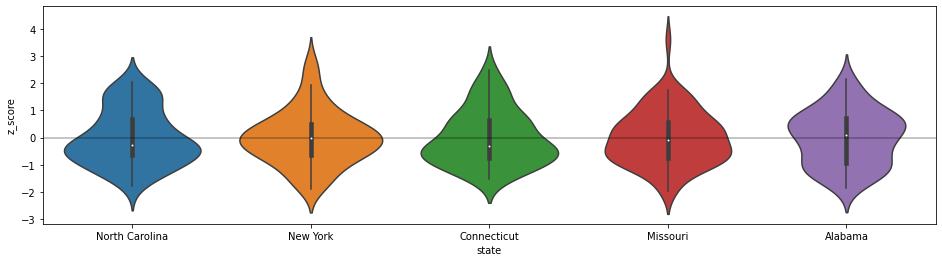

In [132]:
df_dc_states = new_df.loc[:, ['state','Solids']]
dc_states = {}

lista_estados = df_dc_states.state.unique()
for i in lista_estados:
    #print(i)
    #cria array com solids do estado
    data = np.array(df_dc_states[df_dc_states.state == i].Solids)
    #print(data)
    #print(stats.zscore(data))
    dc_states[i] = stats.zscore(data)

#chama funcao
violin_plot_states(dc_states, ['Alabama','North Carolina','New York','Missouri','Connecticut'])

In [ ]:
North Caroline está com a maior concentração de amostras abaixo da média.
New York é o estado que tem mais amostras na média.
Connecticut tem uma concentração alta de amostras 1 z-score abaixo da média.
Missouri tem a maior parte das amostras entre a média e 1 z-score negativo.
Alabama tem uma dispersão maior das amostras pelo z-score